# Assignment A3: Car price classification
## Nutdanai Sritunya MMI st123055

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import matplotlib

# 1. Load and preparing datasets

In [2]:
df = pd.read_csv('./Cars.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# That mean you data have 12 feature and 1 label 
df.shape

(8128, 13)

In [5]:
# Check Dtypes of your input data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


you will see that are so many object type so we need to do something with this first. Follow the instruction of Chaky, First we need to
- map First owner to 1, ..., Test Drive Car to 5

In [6]:
le = LabelEncoder()
print(set(df["owner"]))
df["owner"] = le.fit_transform(df["owner"])+1

{'Third Owner', 'First Owner', 'Test Drive Car', 'Second Owner', 'Fourth & Above Owner'}


In [7]:
df["owner"]

0       1
1       3
2       5
3       1
4       1
       ..
8123    1
8124    2
8125    1
8126    1
8127    1
Name: owner, Length: 8128, dtype: int32

In [8]:
le.transform(['First Owner'])

array([0])

In [9]:
set(df["owner"]) #Now the owner feature is already map to number

{1, 2, 3, 4, 5}

• For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [10]:
df['fuel'].value_counts() #Before

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [11]:
df_filtered = df.loc[~df['fuel'].isin(['CNG', 'LPG'])]
df_filtered['fuel'].value_counts() #After

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

- For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

In [12]:
df_filtered['mileage'][0]

'23.4 kmpl'

In [13]:
# Remove the "kmpl" by split and select the first object ['23.4', 'kmpl'] and convert to float
df_filtered['mileage'] = df_filtered['mileage'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp\ipykernel_19716\3418012339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mileage'] = df_filtered['mileage'].str.split(' ').str[0].astype(float)


- For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [14]:
df_filtered['engine'] = df_filtered['engine'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp\ipykernel_19716\3239265068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['engine'] = df_filtered['engine'].str.split(' ').str[0].astype(float)


- Do the same for max power

In [15]:
df_filtered['max_power'] = df_filtered['max_power'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp\ipykernel_19716\1974573241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['max_power'] = df_filtered['max_power'].str.split(' ').str[0].astype(float)


 For the feature brand, take only the first word and remove the rest

In [16]:
df_filtered['name'] = df_filtered['name'].str.split(' ').str[0]

C:\Users\earth\AppData\Local\Temp\ipykernel_19716\81196181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['name'] = df_filtered['name'].str.split(' ').str[0]


Drop the feature torque, simply because Chaky’s company does not understand well about it

In [17]:
df_filtered = df_filtered.drop('torque', axis=1)

- You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it

In [18]:
le.transform(["Test Drive Car"])

array([3])

In [19]:
print(df_filtered['owner'].unique(), df_filtered['owner'].count()) #the owner feature before we delete Test drive car
df_filteredd = df_filtered[df_filtered['owner'] != 3] #we know Test drive car is map to 3
print(df_filteredd['owner'].unique(), df_filteredd['owner'].count()) #the owner after deleted

[1 3 5 2 4] 8033
[1 5 2 4] 5960


- Since selling price is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform, i.e.,

In [20]:
df_filteredd['selling_price'] = np.log(df_filteredd['selling_price'])

C:\Users\earth\AppData\Local\Temp\ipykernel_19716\2761593400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filteredd['selling_price'] = np.log(df_filteredd['selling_price'])


Finally this is a clean data after do following step.

In [21]:
df_filteredd.head() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,5,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,12.994530,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0


In [22]:
df_filteredd.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,5960.000000,5960.000000,5.960000e+03,5960.000000,5831.000000,5831.000000,5837.000000,5831.000000
mean,2014.561074,13.105088,6.268093e+04,1.398154,19.637210,1456.294461,93.591889,5.401475
std,3.835775,0.836889,4.965373e+04,1.160271,3.998052,496.104314,37.144458,0.944711
min,1983.000000,10.308919,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2012.000000,12.611538,2.809500e+04,1.000000,16.950000,1197.000000,70.000000,5.000000
50%,2016.000000,13.122363,5.458500e+04,1.000000,19.610000,1248.000000,83.140000,5.000000
75%,2017.000000,13.507626,9.000000e+04,1.000000,22.540000,1582.000000,103.500000,5.000000
max,2020.000000,16.118096,1.500000e+06,5.000000,42.000000,3604.000000,400.000000,14.000000


In [23]:
df_filteredd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5960 non-null   object 
 1   year           5960 non-null   int64  
 2   selling_price  5960 non-null   float64
 3   km_driven      5960 non-null   int64  
 4   fuel           5960 non-null   object 
 5   seller_type    5960 non-null   object 
 6   transmission   5960 non-null   object 
 7   owner          5960 non-null   int32  
 8   mileage        5831 non-null   float64
 9   engine         5831 non-null   float64
 10  max_power      5837 non-null   float64
 11  seats          5831 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(4)
memory usage: 582.0+ KB


## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Boxplot

<AxesSubplot:xlabel='seats', ylabel='count'>

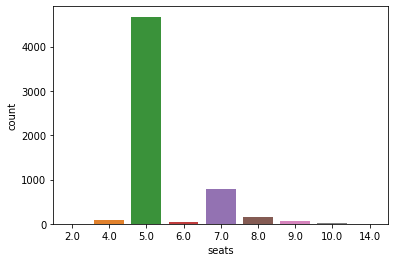

In [24]:
# most of data in this datasets is 5 seats car.
sns.countplot(data = df_filteredd, x = 'seats')

<AxesSubplot:xlabel='transmission', ylabel='count'>

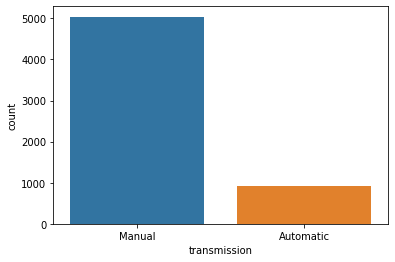

In [25]:
sns.countplot(data = df_filteredd, x = 'transmission')

<AxesSubplot:xlabel='seller_type', ylabel='count'>

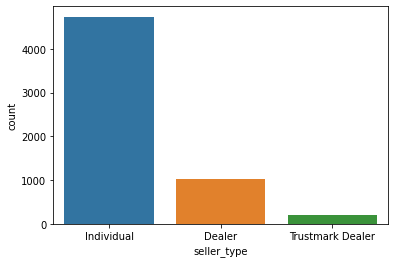

In [26]:
sns.countplot(data = df_filteredd, x = 'seller_type')

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the life expectancy.  It's also for checking whether certain features are too correlated.

<AxesSubplot:>

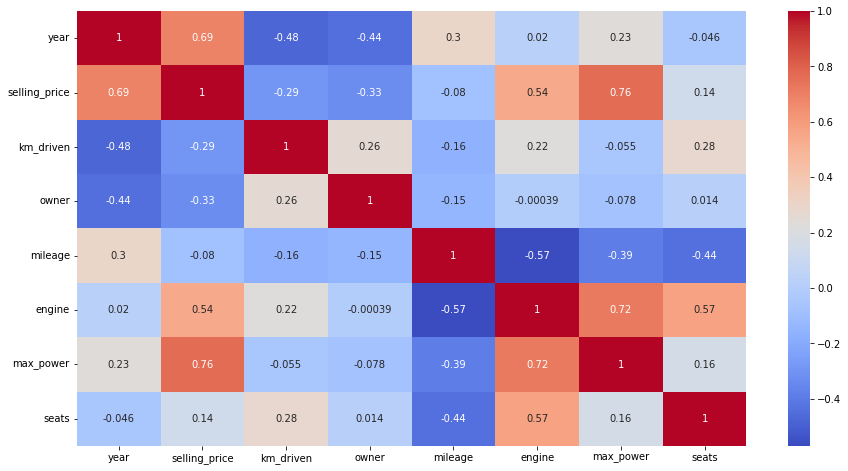

In [27]:
filtered_corr = df_filteredd.corr()
plt.figure(figsize = (15,8))
sns.heatmap(filtered_corr,  annot=True, cmap="coolwarm")

<AxesSubplot:xlabel='x', ylabel='y'>

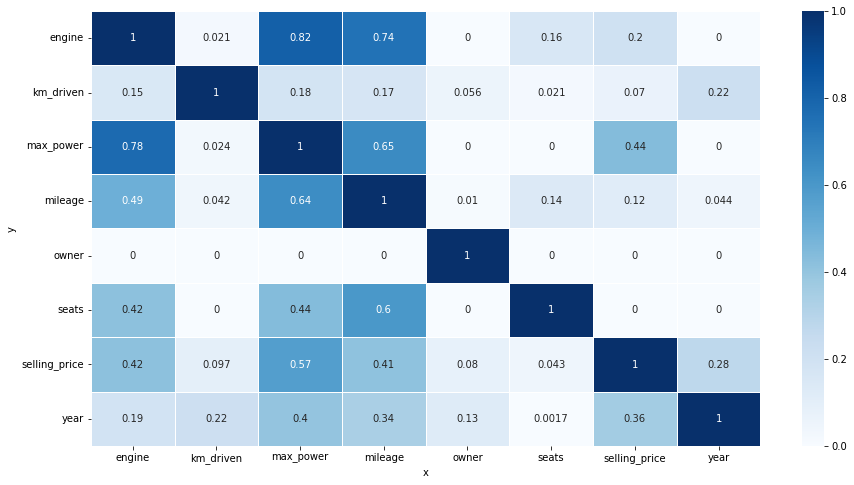

In [28]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df_filteredd.copy()
dfcopy.drop([ 'transmission', 'name', 'seller_type', 'fuel'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Feature selection

In [29]:
X = dfcopy[['engine', 'max_power', 'year']]
y = dfcopy["selling_price"]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

In [31]:
X_train[['engine', 'max_power', 'year']].isna().sum()

engine       98
max_power    95
year          0
dtype: int64

In [32]:
X_test[['engine', 'max_power', 'year']].isna().sum()

engine       31
max_power    28
year          0
dtype: int64

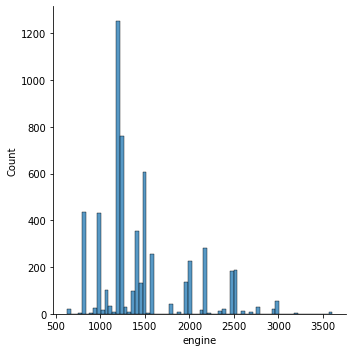

In [33]:
sns.displot(data=dfcopy, x='engine')

In [34]:
mode_value = dfcopy['engine'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 1248.0


In [35]:
dfcopy['engine'].median()

1248.0

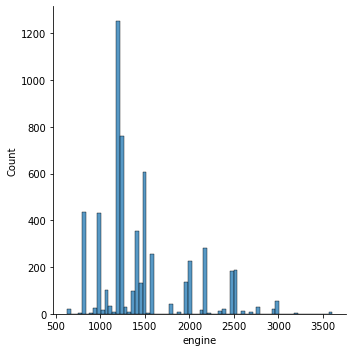

In [36]:
sns.displot(data=dfcopy, x='engine')

In [37]:
mode_value = dfcopy['engine'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 1248.0


In [38]:
dfcopy['engine'].median()

1248.0

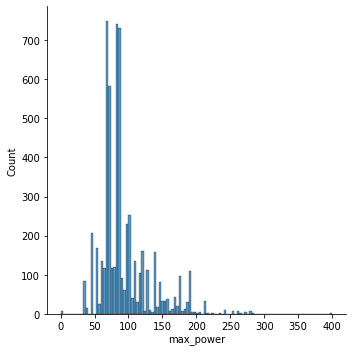

In [39]:
sns.displot(data=dfcopy, x='max_power')

In [40]:
mode_value = dfcopy['max_power'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 74.0


In [41]:
dfcopy['max_power'].median()

83.14

In [42]:
dfcopy['max_power'].mean()

93.59188881274628

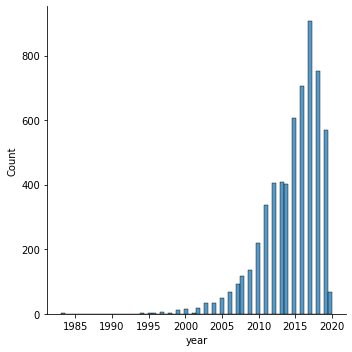

In [43]:
sns.displot(data=dfcopy, x='year')

In [44]:
mode_value = dfcopy['year'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 2017


In [45]:
dfcopy['year'].median()

2016.0

In [46]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['year'].fillna(X_train['year'].median(), inplace=True)

In [47]:
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['year'].fillna(X_test['year'].median(), inplace=True)

In [48]:
X_train[['engine', 'max_power', 'year']].isna().sum()

engine       0
max_power    0
year         0
dtype: int64

In [49]:
X_test[['engine', 'max_power', 'year']].isna().sum()

engine       0
max_power    0
year         0
dtype: int64

#### Check the outliner

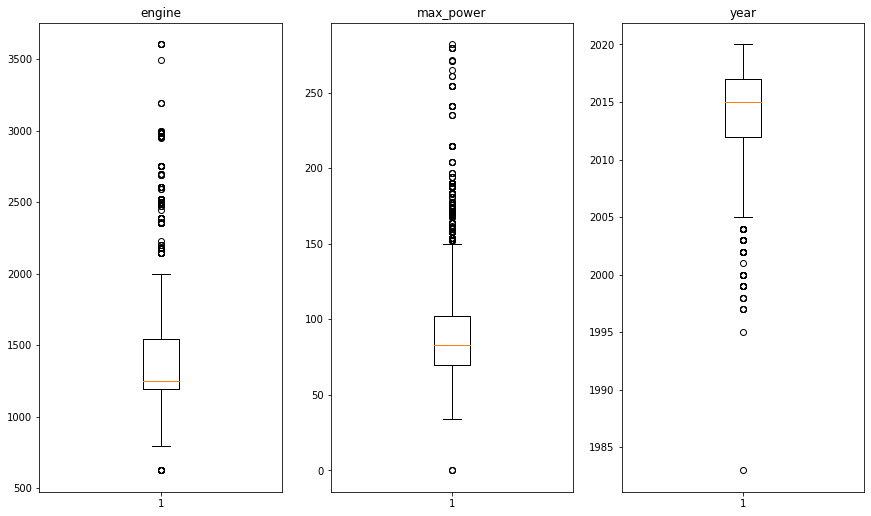

In [50]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2,'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,50))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [51]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [52]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 611
Percent of data that is outlier: 14.65%

---------------max_power---------------

Number of outliers: 353
Percent of data that is outlier: 8.46%

---------------year---------------

Number of outliers: 91
Percent of data that is outlier: 2.18%


In [53]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (4172, 3)
Shape of X_test:  (1788, 3)
Shape of y_train:  (4172,)
Shape of y_test:  (1788,)


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from time import time

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [55]:
X_train.shape

(4172, 4)

In [56]:
y_train

1203    12.971540
5088    14.508658
7729    11.982929
7935    10.596635
2962    12.301383
          ...    
2380    12.736701
2342    12.301383
4397    13.946539
7265    12.542545
6459    12.608199
Name: selling_price, Length: 4172, dtype: float64

In [57]:
num_classes = 4
# # Calculate the quantiles
quantiles = np.linspace(0, 1, num_classes + 1)

# Calculate the actual values at the quantiles
quantile_values = y_train.quantile(quantiles)

# Manually set negative and positive infinity at the desired quantiles
quantile_values[0] = float('-inf')
quantile_values[-1] = float('inf')

y_train = pd.cut(y_train, bins=quantile_values, labels=False)
y_test = pd.cut(y_test, bins=quantile_values, labels=False)

In [58]:
y_train_class = y_train.values
y_test_class = y_test.values

In [59]:
y_train_class = np.array(y_train_class)
y_test_class = np.array(y_test_class)

In [60]:
k = len(set(y_train_class))
m = X_train.shape[0]
n = X_train.shape[1]

In [61]:
unique_classes, class_counts = np.unique(y_train_class, return_counts=True)

# Print the results
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} ")

Class 0: 1117 
Class 1: 988 
Class 2: 1034 
Class 3: 1033 


In [62]:
import mlflow
import os
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
mlflow.set_experiment(experiment_name="st123055-a3")

<Experiment: artifact_location='mlflow-artifacts:/781162288811676217', creation_time=1696177153053, experiment_id='781162288811676217', last_update_time=1696177153053, lifecycle_stage='active', name='st123055-a3', tags={}>

## 4.Modeling

In [63]:
import pandas as pd
class Logistic_regression(object):
     
    def __init__(self,regularization, n=4, k=4, lr=0.0001,method='batch', num_epochs=2000, batch_size=254):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.regularization = regularization
        self.n = n
        self.num_class = k
        self.prev_step = 0
        self.moment = True

    def xaviar (self, size) :
        m = size
        lower , upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))
        numbers = np.random.rand(self.n, self.num_class)
        scaled = lower + numbers * (upper - lower)
        return scaled
    
    def fit(self, weight_init,moment ,X_train, y_train):
        self.val_loss_old = np.infty
        if weight_init == 'zero' :
            self.theta = np.zeros(X_train.shape[1])
        else :
            self.theta = self.xaviar(X_train.shape[1])  
        if moment == True :
            self.moment = True
        else : 
            self.moment = False        
        params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
        mlflow.log_params(params=params)
        for epoch in range(self.num_epochs):
            
            if self.method == 'sto':
                for batch_idx in range(X_train.shape[0]):
                    X_method_train = X_train[batch_idx].reshape(1, -1)
                    y_method_train = y_train[batch_idx] 
                    y_method_train = np.array([y_method_train])
                    train_loss = self._train(X_method_train, y_method_train)
            elif self.method == 'minibatch':
                for batch_idx in range(0, X_train.shape[0], self.batch_size):
                    X_method_train = X_train[batch_idx:batch_idx+self.batch_size, :]
                    y_method_train = y_train[batch_idx:batch_idx+self.batch_size]
                    train_loss = self._train(X_method_train, y_method_train)
            else:
                X_method_train = X_train
                y_method_train = y_train
                train_loss = self._train(X_method_train, y_method_train)

            if epoch % 500 == 0 :
                print(f"loss at epoch {epoch} = {train_loss}")  

    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = X.T @(yhat - y) + self.regularization.derivation(self.theta)
        self.theta = self.theta - (self.lr * grad)
        if self.method == 'sto' :
            y = np.array([y])
        return self.loss(y, yhat)

    def loss(self, ytrue, ypred) :
        return - np.sum(ytrue * np.log(self.softmax(ypred))) / ytrue.shape[0]
    
    def softmax(self, h_theta) :
        return np.exp(h_theta) / np.sum(np.exp(h_theta), axis=1, keepdims=True)

    def predict(self, X):
        return self.softmax(X @ self.theta)  
    
    def _coef(self):
        return self.theta[1:]  

    def _bias(self):
        return self.theta[0]

In [64]:
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
     
class Ridge(Logistic_regression):
    
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization,n,k, lr, method)  


In [65]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [66]:
def encode(original_data) :
    num_classes = np.max(original_data) + 1
    encoded_data = np.zeros((original_data.shape[0], num_classes))
    encoded_data[np.arange(original_data.shape[0]), original_data.flatten()] = 1
    return encoded_data

In [67]:
encoded_y = encode(y_train_class)
encoded_y_test = encode(y_test_class)

In [68]:
def accuracy(yhat, ytrue) :
    correct = 0
    for idx, v in enumerate(ytrue) :
        if v == yhat[idx] :
            correct += 1
    return  correct/len(yhat)       

def precision(yhat, ytrue, class_det) :
    tp = 0
    fp = 0
    for idx , a in enumerate(ytrue) :
        if yhat[idx] == class_det and a == class_det :
            tp += 1
        if yhat[idx] == class_det and a != class_det :
            fp += 1
    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)        
    return precision

def recall(yhat, ytrue, class_det) :
    tp = 0
    fn = 0
    for idx , a in enumerate(ytrue) :
        if yhat[idx] == class_det and a == class_det :
            tp += 1
        if yhat[idx] != class_det and a == class_det :
            fn += 1
        if tp+fn == 0:
            recall = 0
        else :
            recall = tp/(tp+fn)

    return recall

def f1(prec, rec):
    if prec == 0 or rec == 0:
        return 0  
    return (2 * prec * rec) / (prec + rec)

def marco_precision(list_precise) :
    return np.array(list_precise).mean()
def marco_recall(list_recall) :
    return np.array(list_recall).mean()
def marco_f1(list_f1) :
    return np.array(list_f1).mean()

def weight_precision(list_precise) :
    return ( 0.2*list_precise[0] + 0.3*list_precise[1] + 0.2*list_precise[2] + 0.3*list_precise[3])
def weight_recall(list_recall) :
    return ( 0.2*list_recall[0] + 0.3*list_recall[1] + 0.2*list_recall[2] + 0.3*list_recall[3])
def weight_f1(list_f1) :
    return ( 0.2*list_f1[0] + 0.3*list_f1[1] + 0.2*list_f1[2] + 0.3*list_f1[3])

In [69]:
reg = "Ridge"
lr = 0.0008
method = 'minibatch'
init_w = 'xaviar'


params = {"method": method,"lr": lr , "l": 0.45}
mlflow.start_run(run_name=f"Retrain-Ridge-logistic-method-minibatch-lr-{params['lr']}")

print("="*5, f"{reg}-{method}-lr={lr}--init_weight with {init_w} use mometum", "="*5)

type_of_regression = str_to_class(reg)
model = type_of_regression(**params)  
model.fit(init_w,False,X_train, encoded_y)
yhat = model.predict(X_test)
losses = model.loss(encoded_y_test, yhat)
yhat = np.argmax(yhat, axis=1)
acc = accuracy(yhat,y_test_class)
y_pred = yhat
y_true = y_test_class
precision_0 = precision(y_pred, y_true, 0)
recall_0 = recall(y_pred, y_true, 0)
f1_score_0 = f1(precision_0, recall_0)
support_0 = np.sum(y_true == 0)

precision_1 = precision(y_pred, y_true, 1)
recall_1 = recall(y_pred, y_true, 1)
f1_score_1 = f1(precision_1, recall_1)
support_1 = np.sum(y_true == 1)

precision_2 = precision(y_pred, y_true, 2)
recall_2 = recall(y_pred, y_true, 2)
f1_score_2 = f1(precision_2, recall_2)
support_2 = np.sum(y_true == 2)

precision_3 = precision(y_pred, y_true, 3)
recall_3 = recall(y_pred, y_true, 3)
f1_score_3 = f1(precision_3, recall_3)
support_3 = np.sum(y_true == 3)

correct_predictions = sum(1 for pred, true in zip(y_pred, y_true) if pred == true)
accuracy_total = correct_predictions / len(y_true)

macro_avg_precision = marco_precision([precision_0,precision_1,precision_2, precision_3])
macro_avg_recall = marco_recall([recall_0,recall_1,recall_2 , recall_3])
macro_avg_f1_score = marco_f1([f1_score_0, f1_score_1, f1_score_2, f1_score_3])
macro_avg_support = len(y_true)

weighted_avg_precision = weight_precision([precision_0,precision_1,precision_2, precision_3])
weighted_avg_recall = weight_recall([recall_0,recall_1,recall_2 , recall_3])
weighted_avg_f1_score = weight_f1([f1_score_0, f1_score_1, f1_score_2, f1_score_3])
weighted_avg_support = len(y_true)
mlflow.log_metric(key="test_loss", value=losses)
mlflow.log_metric(key="accuracy", value=acc)
mlflow.log_metric(key="f1-class0", value=f1_score_0)
mlflow.log_metric(key="f1-class1", value=f1_score_1)
mlflow.log_metric(key="f1-class2", value=f1_score_2)
mlflow.log_metric(key="f1-class3", value=f1_score_3)
mlflow.log_metric(key="f1-marco", value=macro_avg_f1_score)
mlflow.log_metric(key="f1-weight", value=weighted_avg_f1_score)
signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)
mlflow.end_run()

===== Ridge-minibatch-lr=0.0008--init_weight with xaviar use mometum =====
loss at epoch 0 = 1.2426315017994969
loss at epoch 500 = 1.1400783992989953
loss at epoch 1000 = 1.1400783992978123
loss at epoch 1500 = 1.1400783992978123


c:\Users\earth\AppData\Local\Programs\Python\Python39\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## 5. Classification report

In [70]:
def classification_report(y_pred, y_true) :
    precision_0 = precision(y_pred, y_true, 0)
    recall_0 = recall(y_pred, y_true, 0)
    f1_score_0 = f1(precision_0, recall_0)
    support_0 = np.sum(y_true == 0)
    precision_1 = precision(y_pred, y_true, 1)
    recall_1 = recall(y_pred, y_true, 1)
    f1_score_1 = f1(precision_1, recall_1)
    support_1 = np.sum(y_true == 1)
    precision_2 = precision(y_pred, y_true, 2)
    recall_2 = recall(y_pred, y_true, 2)
    f1_score_2 = f1(precision_2, recall_2)
    support_2 = np.sum(y_true == 2)
    precision_3 = precision(y_pred, y_true, 3)
    recall_3 = recall(y_pred, y_true, 3)
    f1_score_3 = f1(precision_3, recall_3)
    support_3 = np.sum(y_true == 3)
    correct_predictions = sum(1 for pred, true in zip(y_pred, y_true) if pred == true)
    accuracy_total = correct_predictions / len(y_true)
    macro_avg_precision = marco_precision([precision_0,precision_1,precision_2, precision_3])
    macro_avg_recall = marco_recall([recall_0,recall_1,recall_2 , recall_3])
    macro_avg_f1_score = marco_f1([f1_score_0, f1_score_1, f1_score_2, f1_score_3])
    macro_avg_support = len(y_true)
    weighted_avg_precision = weight_precision([precision_0,precision_1,precision_2, precision_3])
    weighted_avg_recall = weight_recall([recall_0,recall_1,recall_2 , recall_3])
    weighted_avg_f1_score = weight_f1([f1_score_0, f1_score_1, f1_score_2, f1_score_3])
    weighted_avg_support = len(y_true)
    print(f"                precision   recall   f1_score     support  ")
    print(f"     class 0       {precision_0:.2f}      {recall_0:.2f}      {f1_score_0:.2f}         {support_0}")
    print(f"     class 1       {precision_1:.2f}      {recall_1:.2f}      {f1_score_1:.2f}         {support_1}")
    print(f"     class 2       {precision_2:.2f}      {recall_2:.2f}      {f1_score_2:.2f}         {support_2}")
    print(f"     class 3       {precision_3:.2f}      {recall_3:.2f}      {f1_score_3:.2f}         {support_3}")
    print()
    print(f"    accuracy                           {accuracy_total:.2f}         {len(y_true)}")  # support for accuracy is the total count
    print(f"   macro avg       {macro_avg_precision:.2f}      {macro_avg_recall:.2f}      {macro_avg_f1_score:.2f}         {macro_avg_support}")
    print(f"weighted avg       {weighted_avg_precision:.2f}      {weighted_avg_recall:.2f}      {weighted_avg_f1_score:.2f}         {weighted_avg_support}")

In [71]:
classification_report(y_pred, y_true)

                precision   recall   f1_score     support  
     class 0       0.79      0.82      0.80         448
     class 1       0.58      0.48      0.52         437
     class 2       0.51      0.66      0.58         441
     class 3       0.83      0.71      0.76         462

    accuracy                           0.67         1788
   macro avg       0.68      0.67      0.67         1788
weighted avg       0.68      0.65      0.66         1788


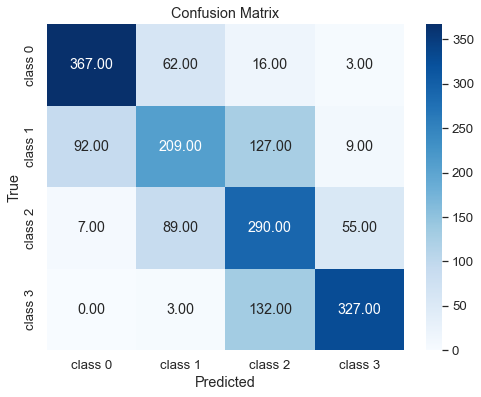

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


num_classes = len(np.unique(y_true))
confusion_matrix = np.zeros((num_classes, num_classes))
for i in range(len(y_true)):
    confusion_matrix[y_true[i]][y_pred[i]] += 1

target_names = ['class 0', 'class 1', 'class 2', 'class 3']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt=".2f",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [73]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [74]:
def prediction(model, data) :
    dd = np.array(data).reshape(1,-1)
    data = scaler.transform(dd)
    data = np.concatenate((np.array([[1]]), data), axis=1)
    result = model.predict(data)
    return np.argmax(result, axis=1)

In [75]:
# feature is engine max_power years
print(f"predicted class {prediction(model, [1024,78,2015])[0]}")

predicted class 1


In [77]:
model

In [80]:
import joblib

# Save the model
joblib.dump(model, 'model/classification.pkl')

classi_model = joblib.load('model/classification.pkl')

['classification.pkl']

## Summary
For the summary of this assignment at first i use normal pd.cut and do SMOTE to fix the imbalance datasets. i get the accuracy 0.759 and f1-macro 0.753, f1-weight 0.752. For now i try to fix the imbalance class by use the quantile to get the range to split 4 class, after training i got accuracy 0.66, so i stagging in mlflow server with first model.